Ищем самые популярные первые слова и выражения в диалоге

Просмотр результатов показал, что отдельные слова выдавать не стоит, лучше брать целые фразы

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
%matplotlib inline
import my_speller
import imp
imp.reload(my_speller)
from autocorrect import spell as spell_eng

import pygtrie as trie

In [28]:
client_mess = pd.read_csv('Client_messages_cleaned.csv', encoding='Windows-1251', sep=';', header=None)
del client_mess[0]

In [30]:
client_mess.dropna(inplace=True)

In [31]:
client_mess[1] = client_mess[1].apply(lambda x: re.sub('#\s*\w+', ' ', x))

In [32]:
client_mess.dropna(inplace=True)

Функции для выделения первого слова, первых двух и первых трех слов в сообщении. Приводим к нижнему регистру, чтобы не плодить лишних слов. Возвращает None, если сообщение слишком короткое

In [51]:
def get_first_word(s):
    x = re.findall('\w+', s)
    if x:
        return x[0].lower()
    else:
        return None

In [52]:
def get_first_two(s):
    x = re.findall('\w+', s)
    if x:
        if len(x) >= 2:
            return x[0].lower() + ' ' + x[1].lower()
        else:
            return None
    else:
        return None

In [53]:
def get_first_three(s):
    x = re.findall('\w+', s)
    if x:
        if len(x) >= 3:
            return x[0].lower() + ' ' + x[1].lower() + ' ' + x[2].lower()
        else:
            return None
    else:
        return None

In [54]:
client_mess['word1'] = client_mess[1].apply(get_first_word)

In [55]:
client_mess['first_two'] = client_mess[1].apply(get_first_two)

In [56]:
client_mess['first_three'] = client_mess[1].apply(get_first_three)

In [ ]:
for i in client_mess.index.values:
    try:
        x = re.findall('\w+', client_mess.loc[i, 1])
        print(x)
    except TypeError:
        print(client_mess.loc[i, 1])

In [ ]:
re.findall('\w+', 'Кредитная')[0]

In [57]:
client_mess.head(40)

,1,word1,first_two,first_three
0,"Я внес деньги на карту. Когда они придут, я их...",я,я внес,я внес деньги
1,Кредитная,кредитная,None,None
2,По карте,по,по карте,None
3,Да,да,None,None
4,Да,да,None,None
5,"ООО, вас чат появился",ооо,ооо вас,ооо вас чат
6,Прикольное,прикольное,None,None
7,А баланс можете сказать,а,а баланс,а баланс можете
8,"А нет, не надо",а,а нет,а нет не
9,А до вы работаете,а,а до,а до вы


In [58]:
client_mess.word1.value_counts()

здравствуйте          74135
спасибо               68509
да                    47079
а                     37586
я                     37136
добрый                33485
нет                   27615
как                   20057
хорошо                15407
на                    15182
хочу                  13231
мне                   12995
у                     12953
в                     12658
и                     11386
не                     8571
ок                     6848
можно                  6524
подскажите             6405
что                    6297
это                    5986
если                   5960
могу                   5631
потребительский        5588
вы                     4491
скажите                4348
понятно                4064
но                     4033
ну                     3780
по                     3766
                      ...  
широко                    1
подтверждающая            1
вту                       1
перебил                   1
мур                 

In [59]:
client_mess.first_two.value_counts()

добрый день                25159
у меня                     10661
здравствуйте я              9379
нет спасибо                 8038
добрый вечер                7959
хорошо спасибо              7602
хочу взять                  6212
здравствуйте подскажите     5067
спасибо большое             4578
спасибо за                  4566
а если                      4336
могу ли                     4027
я хочу                      3949
а как                       3706
здравствуйте у              3604
здравствуйте хочу           3357
то есть                     3262
здравствуйте скажите        3129
можно ли                    2918
я не                        2894
здравствуйте как            2793
ок спасибо                  2556
т е                         2519
не могу                     2482
здравствуйте мне            2423
подскажите пожалуйста       2414
как мне                     2228
здравствуйте могу           2111
понятно спасибо             2100
доброе утро                 2094
          

In [60]:
client_mess.first_three.value_counts()

хочу взять кредит                     5029
могу ли я                             3724
добрый день подскажите                3381
здравствуйте у меня                   3316
здравствуйте подскажите пожалуйста    2623
здравствуйте скажите пожалуйста       1931
у меня есть                           1825
добрый день я                         1786
здравствуйте могу ли                  1744
здравствуйте я бы                     1641
здравствуйте хочу взять               1557
я хочу взять                          1499
спасибо за информацию                 1488
здравствуйте я хочу                   1436
добрый день у                         1169
спасибо до свидания                   1048
мне нужен кредит                      1037
здравствуйте я хотела                 1030
здравствуйте я хотел                  1017
здравствуйте можно ли                  996
а если я                               994
как я могу                             988
я бы хотела                            972
спасибо за 

In [61]:
top_phrases = pd.concat([client_mess.first_two.value_counts(), client_mess.first_three.value_counts()], axis=0)

In [64]:
top_phrases.sort_values(inplace=True, ascending=False)

In [87]:
top_phrases.head(60)

добрый день                           25159
у меня                                10661
здравствуйте я                         9379
нет спасибо                            8038
добрый вечер                           7959
хорошо спасибо                         7602
хочу взять                             6212
здравствуйте подскажите                5067
хочу взять кредит                      5029
спасибо большое                        4578
спасибо за                             4566
а если                                 4336
могу ли                                4027
я хочу                                 3949
могу ли я                              3724
а как                                  3706
здравствуйте у                         3604
добрый день подскажите                 3381
здравствуйте хочу                      3357
здравствуйте у меня                    3316
то есть                                3262
здравствуйте скажите                   3129
можно ли                        

In [68]:
top_phrases.index.values

array(['добрый день', 'у меня', 'здравствуйте я', ..., 'детской карты',
       'за визу', 'спасибо паттерны поведения'], dtype=object)

In [69]:
num_popular = 30
popular = []
for s in top_phrases.index.values:
    if not s.startswith('здравствуйте'):
        popular.append(s)
    if len(popular) == 30:
        break
print(popular)

['добрый день', 'у меня', 'нет спасибо', 'добрый вечер', 'хорошо спасибо', 'хочу взять', 'хочу взять кредит', 'спасибо большое', 'спасибо за', 'а если', 'могу ли', 'я хочу', 'могу ли я', 'а как', 'добрый день подскажите', 'то есть', 'можно ли', 'я не', 'ок спасибо', 'т е', 'не могу', 'подскажите пожалуйста', 'как мне', 'понятно спасибо', 'доброе утро', 'скажите пожалуйста', 'ясно спасибо', 'я бы', 'мне нужно', 'до свидания']


In [15]:
def get_top_n(df, col, n):
    num_popular = n
    popular = []
    stopwords =  ['здравствуйте', 'добрый день', 'добрый вечер', 'спасибо', 'хорошо']
    for s in df[col].value_counts().index.values:
        ret = True
        for stopword in stopwords:
            if s.startswith(stopword):
                ret = False
                break
        if ret:
            popular.append(s.capitalize())
        if len(popular) == 30:
            break
    print(popular)

In [81]:
%%time
get_top_n(client_mess, 'first_two', 30)

['У меня', 'Нет спасибо', 'Хочу взять', 'А если', 'Могу ли', 'Я хочу', 'А как', 'То есть', 'Можно ли', 'Я не', 'Ок спасибо', 'Т е', 'Не могу', 'Подскажите пожалуйста', 'Как мне', 'Понятно спасибо', 'Доброе утро', 'Скажите пожалуйста', 'Ясно спасибо', 'Я бы', 'Мне нужно', 'До свидания', 'Меня интересует', 'Я могу', 'Если я', 'Как можно', 'Я хотел', 'А в', 'Мне нужен', 'Хочу оформить']
Wall time: 357 ms


In [80]:
%%time
get_top_n(client_mess, 'first_three', 30)

['Хочу взять кредит', 'Могу ли я', 'У меня есть', 'Я хочу взять', 'Мне нужен кредит', 'А если я', 'Как я могу', 'Я бы хотела', 'Я не могу', 'Я хотел бы', 'Я бы хотел', 'Как это сделать', 'Я хотела бы', 'Хочу оформить кредит', 'Что для этого', 'У меня вопрос', 'У меня нет', 'Какие документы нужны', 'Хотел бы взять', 'Дело в том', 'Доброго времени суток', 'Меня интересует кредит', 'Как взять кредит', 'У меня не', 'Не могу найти', 'Через сбербанк онлайн', 'В личном кабинете', 'На ремонт квартиры', 'Нет спасибо большое', 'То есть я']
Wall time: 495 ms


In [82]:
l3 = ['Хочу взять кредит', 'Могу ли я', 'У меня есть', 'Я хочу взять', 'Мне нужен кредит', 'А если я', 'Как я могу', 'Я бы хотела', 'Я не могу', 'Я хотел бы', 'Я бы хотел', 'Как это сделать', 'Я хотела бы', 'Хочу оформить кредит', 'Что для этого', 'У меня вопрос', 'У меня нет', 'Какие документы нужны', 'Хотел бы взять', 'Меня интересует кредит', 'Как взять кредит', 'У меня не', 'Не могу найти', 'В личном кабинете']

In [ ]:
l2 = ['У меня', 'Нет спасибо', 'Хочу взять', 'А если', 'Могу ли', 'Я хочу', 'А как', 'То есть', 'Можно ли', 'Я не', 'Ок спасибо', 'Т е', 'Не могу', 'Подскажите пожалуйста', 'Как мне', 'Понятно спасибо', 'Доброе утро', 'Скажите пожалуйста', 'Ясно спасибо', 'Я бы', 'Мне нужно', 'До свидания', 'Меня интересует', 'Я могу', 'Если я', 'Как можно', 'Я хотел', 'Мне нужен', 'Хочу оформить']

In [92]:
num_popular = 30
popular = []
stopwords =  ['здравствуйте', 'добрый день', 'добрый вечер', 'спасибо', 'хорошо', 'до свидания', 'подскажите', 'доброе']
stopwords_end = ['спасибо', ' е', 'пожалуйста']
for s in top_phrases.index.values:
    ret = True
    for stopword in stopwords:
        if s.startswith(stopword):
            ret = False
            break
    for stopword_end in stopwords_end:
        if s.endswith(stopword_end):
            ret = False
            break
    if ret:
        popular.append(s.capitalize())
    if len(popular) == 30:
        break
print(popular)

['У меня', 'Хочу взять', 'Хочу взять кредит', 'А если', 'Могу ли', 'Я хочу', 'Могу ли я', 'А как', 'То есть', 'Можно ли', 'Я не', 'Не могу', 'Как мне', 'Я бы', 'Мне нужно', 'Меня интересует', 'У меня есть', 'Я могу', 'Если я', 'Как можно', 'Я хотел', 'А в', 'Мне нужен', 'Я хочу взять', 'Хочу оформить', 'Да я', 'Хотел бы', 'Я хотела', 'На ремонт', 'А можно']


In [5]:
df = pd.read_csv('data/word_freq_dict.csv.zip', compression='zip', encoding='utf-8')

In [6]:
df.head(20)

,word,num,type,top_form,simulated
0,в,19332626,NaN,NaN,False
1,и,11054522,NaN,NaN,False
2,на,6322235,NaN,NaN,False
3,с,4519197,NaN,NaN,False
4,по,3045673,NaN,NaN,False
5,года,2676277,NaN,NaN,False
6,не,2073109,NaN,NaN,False
7,году,2015711,NaN,NaN,False
8,из,1960517,NaN,NaN,False
9,к,1757562,NaN,NaN,False


In [10]:
df.top_form.value_counts(dropna=False)

NaN                      4175863
Южно-Китайские                 1
Отгон-Тэнгэр                   1
•Пункт                         1
e1Ф                            1
Кета-Акатси                    1
Ура-Губы                       1
Серпент-Маунда                 1
Башевис-Зингер                 1
МДП-транзисторов               1
Радосте-Скорбященской          1
Вест-Энду                      1
„Россию                        1
PvP-режим                      1
Фортуна-Импульс                1
Сент-Джорджа                   1
SMP-системы                    1
Ойл-Сити                       1
с.Селец                        1
Соколова-Бородкина             1
Ялгыз-Наратский                1
СанПиНы                        1
Агульяс-Неграс                 1
Амба-Марьям                    1
Пуцек-Григорович               1
Ковель-Волынь-2                1
аль-Кабиру                     1
Минск-Восточный                1
ал-Магриби                     1
Денисово-Алексеевку            1
          

In [9]:
df.shape

(4251149, 5)

In [11]:
df.simulated.value_counts(dropna=False)

True     2809225
False    1441924
Name: simulated, dtype: int64

In [12]:
df.type.value_counts()

cap      107570
other     75286
up        29078
Name: type, dtype: int64

In [16]:
repr(get_top_n)

'<function get_top_n at 0x000000690154EE18>'

In [17]:
x = np.random.uniform(0, 10, 10)
s = np.sum(np.exp(x))
softmaxes = np.exp(x) / np.sum(np.exp(x))
print(softmaxes)

[ 0.0837319   0.0832613   0.00296135  0.00125819  0.62912947  0.00097364
  0.06670361  0.025117    0.00532963  0.10153392]


In [19]:
t = 0.5
softmaxes = np.exp(x / t) / np.sum(np.exp(x / t))
print(softmaxes)

[  1.64896966e-02   1.63048656e-02   2.06257585e-05   3.72325376e-06
   9.30916790e-01   2.22959397e-06   1.04647657e-02   1.48376862e-03
   6.68074165e-05   2.42467277e-02]


In [20]:
def softmax(x, t=1):
    return np.exp(x / t) / np.sum(np.exp(x / t))

In [21]:

for t in np.arange(0.1, 10, 0.1):
    print(t, max(softmax(x, t)) / min(softmax(x, t)))

0.1 1.2688942007e+28
0.2 1.12645204101e+14
0.3 2332429205.7
0.4 10613444.4975
0.5 417527.497501
0.6 48295.229637
0.7 10346.061578
0.8 3257.82818723
0.9 1326.18106738
1.0 646.163677021
1.1 358.803652762
1.2 219.761756539
1.3 145.144958255
1.4 101.715591617
1.5 74.7414801459
1.6 57.077387705
1.7 44.9927637634
1.8 36.4167690409
1.9 30.1389177494
2.0 25.4197497435
2.1 21.7900563312
2.2 18.9421132074
2.3 16.6681753809
2.4 14.8243636133
2.5 13.3087423212
2.6 12.0476121391
2.7 10.98670865
2.8 10.0854147965
2.9 9.31287202236
3.0 8.64531550297
3.1 8.06421522471
3.2 7.55495782285
3.3 7.10589771657
3.4 6.70766455359
3.5 6.35265121843
3.6 6.03463081231
3.7 5.74846694188
3.8 5.48989232584
3.9 5.25533798122
4.0 5.04180024827
4.1 4.84673639959
4.2 4.66798204058
4.3 4.50368526633
4.4 4.35225380779
4.5 4.21231232433
4.6 4.08266767946
4.7 3.96228054043
4.8 3.85024202009
4.9 3.74575436371
5.0 3.64811489968
5.1 3.55670263856
5.2 3.47096703228
5.3 3.39041850426
5.4 3.3146204383
5.5 3.24318237459
5.6 3.1757

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

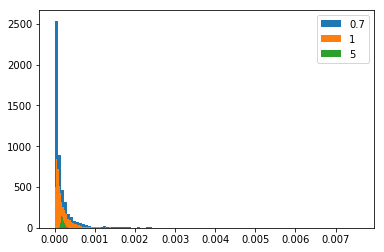

In [35]:
x = np.random.normal(0, 1, 5000)
plt.figure()
ts = [0.7, 1, 5]
for t in ts:
    # plt.scatter(x, softmax(x, t))
    plt.hist(softmax(x, t), bins=100)
legend = list(map(str, ts))
plt.legend(legend)